In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from package import euklid_regressor as eu
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras import optimizers
import tensorflow as tf

In [2]:
yahoo_df = pd.read_csv('../data/GOLD.csv')

In [3]:
yahoo_df =yahoo_df[["Close",'SO',
                       'RSI_1', 'RSI_2', 'RSI_3', 'RSI_14', '1 Day ROI', '2 Day ROI',
                       '3 Day ROI', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
                     "Previous_differenced",
                    "Differenced"]]
price = yahoo_df['Differenced'] 
close = yahoo_df['Close']
yahoo_df

,Close,SO,RSI_1,RSI_2,RSI_3,RSI_14,1 Day ROI,2 Day ROI,3 Day ROI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,Previous_differenced,Differenced
0,264.700012,0.000000,2.846053,7.061393,11.239107,36.757998,-0.010467,-0.012313,-0.012313,-0.715305,-0.812776,0.097471,-0.001866,-0.010467
1,264.000000,0.000000,1.992697,5.612651,9.496422,35.329218,-0.002645,-0.013084,-0.014925,-1.035214,-0.906147,-0.129066,-0.010467,-0.002645
2,263.899994,0.000000,1.835450,5.376279,9.223985,35.120262,-0.000379,-0.003022,-0.013458,-1.282035,-0.922375,-0.359660,-0.002645,-0.000379
3,263.299988,0.000000,0.942761,3.898660,7.502255,33.833893,-0.002274,-0.002652,-0.005289,-1.508667,-0.919206,-0.589461,-0.000379,-0.002274
4,263.200012,0.000000,0.811271,3.648065,7.203531,33.614091,-0.000380,-0.002652,-0.003030,-1.677010,-0.870039,-0.806971,-0.002274,-0.000380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,1961.599976,40.575311,90.559658,77.621193,68.375974,57.049637,0.012909,0.021294,0.017111,14.863501,-6.539497,21.402998,0.008278,0.012909
5317,1953.800049,34.670747,64.029307,63.580037,59.752929,55.472580,-0.003976,0.008882,0.017233,14.708048,-5.355960,20.064008,0.012909,-0.003976
5318,1939.599976,23.921258,30.981571,42.557343,45.748319,52.634477,-0.007268,-0.011215,0.001549,13.285872,-5.422509,18.708381,-0.003976,-0.007268
5319,1912.000000,4.439513,10.305309,21.668710,28.461218,47.566525,-0.014230,-0.021394,-0.025285,9.818518,-7.111890,16.930409,-0.007268,-0.014230


In [4]:
# convert series to supervised learning
values = yahoo_df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
values

array([[ 2.6470001e+02,  0.0000000e+00,  2.8460534e+00, ...,
         9.7470574e-02, -1.8656716e-03, -1.0467244e-02],
       [ 2.6400000e+02,  0.0000000e+00,  1.9926966e+00, ...,
        -1.2906627e-01, -1.0467244e-02, -2.6445491e-03],
       [ 2.6389999e+02,  0.0000000e+00,  1.8354501e+00, ...,
        -3.5966000e-01, -2.6445491e-03, -3.7881100e-04],
       ...,
       [ 1.9396000e+03,  2.3921257e+01,  3.0981571e+01, ...,
         1.8708382e+01, -3.9763087e-03, -7.2679254e-03],
       [ 1.9120000e+03,  4.4395127e+00,  1.0305309e+01, ...,
         1.6930408e+01, -7.2679254e-03, -1.4229726e-02],
       [ 1.9335000e+03,  2.8301895e+01,  5.6026596e+01, ...,
         1.5285355e+01, -1.4229726e-02,  1.1244770e-02]], dtype=float32)

# Train, test, val

In [5]:
X =  yahoo_df[[  'SO',
                       'RSI_1', 'RSI_2', 'RSI_3', 'RSI_14', '1 Day ROI', '2 Day ROI',
                       '3 Day ROI', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
                     "Previous_differenced",
                    ]]

y = yahoo_df["Differenced"]

In [6]:
# Split in 80/20 the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,shuffle=False)
close_train, close_test = train_test_split(close,test_size = 0.20, shuffle=False)

close_train, close_test = list(close_train), list(close_test) 

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(y_train.shape)

(4256, 1, 12)
(4256,)


# LSTM

In [9]:
model = Sequential()
model.add(LSTM(75, return_sequences=False))
model.add(Dropout(0.2))
#model.add(Dense(40))
model.add(Dense(1))

In [10]:
# Set early stopping monitor so the model stops training when it won't improve anymore
esm = EarlyStopping(monitor = 'loss', patience = 70)
# Set the optimizer
opt = tf.optimizers.SGD(learning_rate = 0.001)
#design network
batch_size = int(round(X_train.shape[0]*0.1))
# fit network
model.compile(loss='mae', optimizer=opt)
history = model.fit(X_train, y_train, epochs=2000, batch_size= batch_size, verbose=1,
    shuffle=False, validation_split=0.10)

Epoch 1/2000
9/9 [==============================] - 2s 102ms/step - loss: 0.2573 - val_loss: 0.1559
Epoch 2/2000
9/9 [==============================] - 0s 61ms/step - loss: 0.2299 - val_loss: 0.1410
Epoch 3/2000
9/9 [==============================] - 1s 63ms/step - loss: 0.2228 - val_loss: 0.1308
Epoch 4/2000
9/9 [==============================] - 0s 10ms/step - loss: 0.2194 - val_loss: 0.1224
Epoch 5/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.2119 - val_loss: 0.1164
Epoch 6/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.2143 - val_loss: 0.1098
Epoch 7/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.2071 - val_loss: 0.1029
Epoch 8/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.2078 - val_loss: 0.0989
Epoch 9/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.1994 - val_loss: 0.0929
Epoch 10/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.1973 - val_loss: 0.0896
Epoch 11/2000


Epoch 84/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1228 - val_loss: 0.0353
Epoch 85/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.1240 - val_loss: 0.0347
Epoch 86/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1223 - val_loss: 0.0348
Epoch 87/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1200 - val_loss: 0.0346
Epoch 88/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.1189 - val_loss: 0.0346
Epoch 89/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1173 - val_loss: 0.0341
Epoch 90/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1147 - val_loss: 0.0344
Epoch 91/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1161 - val_loss: 0.0338
Epoch 92/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1143 - val_loss: 0.0332
Epoch 93/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.1115 - val_loss: 0.0334
Epoch 94/2

9/9 [==============================] - 0s 5ms/step - loss: 0.0592 - val_loss: 0.0205
Epoch 167/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0569 - val_loss: 0.0203
Epoch 168/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0576 - val_loss: 0.0202
Epoch 169/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0554 - val_loss: 0.0202
Epoch 170/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0562 - val_loss: 0.0200
Epoch 171/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0543 - val_loss: 0.0199
Epoch 172/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0539 - val_loss: 0.0201
Epoch 173/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0535 - val_loss: 0.0197
Epoch 174/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0523 - val_loss: 0.0195
Epoch 175/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0521 - val_loss: 0.0193
Epoch 176/2000


9/9 [==============================] - 0s 5ms/step - loss: 0.0218 - val_loss: 0.0128
Epoch 249/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0217 - val_loss: 0.0127
Epoch 250/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0212 - val_loss: 0.0126
Epoch 251/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0206 - val_loss: 0.0125
Epoch 252/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 0.0125
Epoch 253/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0214 - val_loss: 0.0124
Epoch 254/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.0123
Epoch 255/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0123
Epoch 256/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0199 - val_loss: 0.0122
Epoch 257/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0206 - val_loss: 0.0121
Epoch 258/2000


9/9 [==============================] - 0s 6ms/step - loss: 0.0162 - val_loss: 0.0094
Epoch 331/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.0094
Epoch 332/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0160 - val_loss: 0.0094
Epoch 333/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0160 - val_loss: 0.0094
Epoch 334/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0159 - val_loss: 0.0094
Epoch 335/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0157 - val_loss: 0.0094
Epoch 336/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0160 - val_loss: 0.0093
Epoch 337/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.0093
Epoch 338/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0154 - val_loss: 0.0093
Epoch 339/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0155 - val_loss: 0.0092
Epoch 340/2000


9/9 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.0078
Epoch 413/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0133 - val_loss: 0.0078
Epoch 414/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0139 - val_loss: 0.0078
Epoch 415/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0140 - val_loss: 0.0078
Epoch 416/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.0078
Epoch 417/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0132 - val_loss: 0.0077
Epoch 418/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0136 - val_loss: 0.0077
Epoch 419/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0131 - val_loss: 0.0077
Epoch 420/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0134 - val_loss: 0.0077
Epoch 421/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.0077
Epoch 422/2000


9/9 [==============================] - 0s 6ms/step - loss: 0.0120 - val_loss: 0.0069
Epoch 495/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0117 - val_loss: 0.0069
Epoch 496/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0119 - val_loss: 0.0069
Epoch 497/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0120 - val_loss: 0.0069
Epoch 498/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0119 - val_loss: 0.0069
Epoch 499/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0119 - val_loss: 0.0069
Epoch 500/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0117 - val_loss: 0.0069
Epoch 501/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0115 - val_loss: 0.0069
Epoch 502/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0119 - val_loss: 0.0068
Epoch 503/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0120 - val_loss: 0.0068
Epoch 504/2000


9/9 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.0064
Epoch 577/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.0064
Epoch 578/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0109 - val_loss: 0.0064
Epoch 579/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0064
Epoch 580/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.0064
Epoch 581/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0108 - val_loss: 0.0064
Epoch 582/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.0064
Epoch 583/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0108 - val_loss: 0.0064
Epoch 584/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.0064
Epoch 585/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0064
Epoch 586/2000


9/9 [==============================] - 0s 8ms/step - loss: 0.0098 - val_loss: 0.0060
Epoch 659/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0102 - val_loss: 0.0060
Epoch 660/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0101 - val_loss: 0.0060
Epoch 661/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0107 - val_loss: 0.0060
Epoch 662/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0100 - val_loss: 0.0060
Epoch 663/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0102 - val_loss: 0.0060
Epoch 664/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0102 - val_loss: 0.0060
Epoch 665/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0102 - val_loss: 0.0060
Epoch 666/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0101 - val_loss: 0.0060
Epoch 667/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0100 - val_loss: 0.0060
Epoch 668/2000


9/9 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.0058
Epoch 741/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0096 - val_loss: 0.0059
Epoch 742/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0099 - val_loss: 0.0059
Epoch 743/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0093 - val_loss: 0.0058
Epoch 744/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0096 - val_loss: 0.0058
Epoch 745/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.0058
Epoch 746/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0097 - val_loss: 0.0057
Epoch 747/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0092 - val_loss: 0.0058
Epoch 748/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.0058
Epoch 749/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.0059
Epoch 750/2000


9/9 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.0056
Epoch 823/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0093 - val_loss: 0.0056
Epoch 824/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.0056
Epoch 825/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.0056
Epoch 826/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.0056
Epoch 827/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0094 - val_loss: 0.0056
Epoch 828/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0093 - val_loss: 0.0056
Epoch 829/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0093 - val_loss: 0.0056
Epoch 830/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.0056
Epoch 831/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0092 - val_loss: 0.0056
Epoch 832/2000


9/9 [==============================] - 0s 6ms/step - loss: 0.0089 - val_loss: 0.0054
Epoch 905/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0087 - val_loss: 0.0054
Epoch 906/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0087 - val_loss: 0.0054
Epoch 907/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0087 - val_loss: 0.0053
Epoch 908/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.0053
Epoch 909/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.0054
Epoch 910/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.0054
Epoch 911/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.0053
Epoch 912/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.0053
Epoch 913/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0089 - val_loss: 0.0054
Epoch 914/2000


9/9 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.0052
Epoch 987/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0088 - val_loss: 0.0052
Epoch 988/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0087 - val_loss: 0.0052
Epoch 989/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0087 - val_loss: 0.0052
Epoch 990/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.0052
Epoch 991/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.0052
Epoch 992/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0084 - val_loss: 0.0052
Epoch 993/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.0053
Epoch 994/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.0053
Epoch 995/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.0053
Epoch 996/2000


9/9 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0052
Epoch 1068/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.0051
Epoch 1069/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0051
Epoch 1070/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0082 - val_loss: 0.0051
Epoch 1071/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0051
Epoch 1072/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0051
Epoch 1073/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0082 - val_loss: 0.0052
Epoch 1074/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0087 - val_loss: 0.0052
Epoch 1075/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0052
Epoch 1076/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0052
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.0051
Epoch 1149/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0051
Epoch 1150/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.0050
Epoch 1151/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0050
Epoch 1152/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0050
Epoch 1153/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0050
Epoch 1154/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.0050
Epoch 1155/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0050
Epoch 1156/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0050
Epoch 1157/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.0050
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.0049
Epoch 1230/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0050
Epoch 1231/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0050
Epoch 1232/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0050
Epoch 1233/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0049
Epoch 1234/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 1235/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 1236/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 1237/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0082 - val_loss: 0.0050
Epoch 1238/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.0049
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0079 - val_loss: 0.0049
Epoch 1311/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 1312/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 1313/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0079 - val_loss: 0.0049
Epoch 1314/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.0049
Epoch 1315/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.0049
Epoch 1316/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0079 - val_loss: 0.0049
Epoch 1317/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 1318/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.0049
Epoch 1319/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 1392/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 1393/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0048
Epoch 1394/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 1395/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 1396/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 1397/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0048
Epoch 1398/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0079 - val_loss: 0.0048
Epoch 1399/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.0048
Epoch 1400/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0047
Epoch 1473/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 1474/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0047
Epoch 1475/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0048
Epoch 1476/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 1477/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0048
Epoch 1478/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0048
Epoch 1479/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 1480/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0047
Epoch 1481/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0048
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 1554/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0047
Epoch 1555/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 1556/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0075 - val_loss: 0.0047
Epoch 1557/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0077 - val_loss: 0.0047
Epoch 1558/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 1559/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0047
Epoch 1560/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 1561/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0047
Epoch 1562/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 1635/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0047
Epoch 1636/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0047
Epoch 1637/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0047
Epoch 1638/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0047
Epoch 1639/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0047
Epoch 1640/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0047
Epoch 1641/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0047
Epoch 1642/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 1643/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0046
Epoch 1716/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0047
Epoch 1717/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 1718/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 1719/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0046
Epoch 1720/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.0046
Epoch 1721/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 1722/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 1723/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0046
Epoch 1724/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 

9/9 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.0046
Epoch 1797/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 1798/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0046
Epoch 1799/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 1800/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0046
Epoch 1801/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0046
Epoch 1802/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0046
Epoch 1803/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 1804/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 1805/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0046
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0045
Epoch 1878/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0046
Epoch 1879/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 1880/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0045
Epoch 1881/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0045
Epoch 1882/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 1883/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 1884/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 1885/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 1886/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0072 - val_loss: 0.0045
Epoch 1959/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0072 - val_loss: 0.0045
Epoch 1960/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 1961/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0045
Epoch 1962/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0045
Epoch 1963/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0072 - val_loss: 0.0045
Epoch 1964/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0045
Epoch 1965/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0072 - val_loss: 0.0045
Epoch 1966/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0045
Epoch 1967/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0045
Epoch 

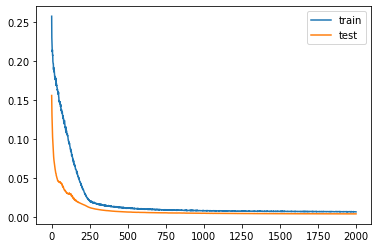

In [20]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Prediction 

In [12]:
predict = model.predict(X_test)
predict = [float(predict[i]) for i in range(len(predict))]
pred = eu.scale_back_pct(predict, close_test)
updown_pred = eu.ud_pred(pred, close_test)

In [13]:
df = pd.DataFrame(updown_pred)
df["Close"] = list(close_test)
df["updown_pred"] = df.iloc[:,0]
df["updown_actual"] = eu.ud(close_test)
df["Scaled_pred"] = pred
df["Pred"] = predict
df = df.iloc[:,1:] 
acc = (df["updown_pred"] == df["updown_actual"]).sum()/df.shape[0]
print('Model Accuracy: ', acc)


Model Accuracy:  0.815962441314554


In [14]:
df

,Close,updown_pred,updown_actual,Scaled_pred,Pred
0,1318.599976,1,1,1318.599976,-0.003207
1,1311.699951,0,0,1312.753542,-0.004434
2,1317.400024,0,1,1309.709176,-0.001518
3,1320.599976,1,1,1319.974685,0.001954
4,1333.400024,1,1,1327.432494,0.005174
...,...,...,...,...,...
1060,1961.599976,1,1,1947.149711,0.005448
1061,1953.800049,1,0,1967.412326,0.002963
1062,1939.599976,0,0,1943.885709,-0.005074
1063,1912.000000,0,0,1909.211322,-0.015667


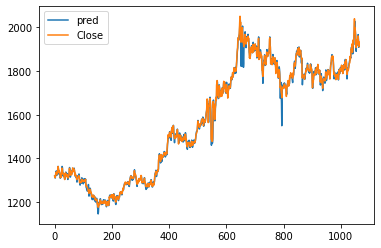

In [15]:
plt.plot(df['Scaled_pred'], label='pred')
plt.plot(df["Close"], label='Close')
plt.legend()
plt.show()

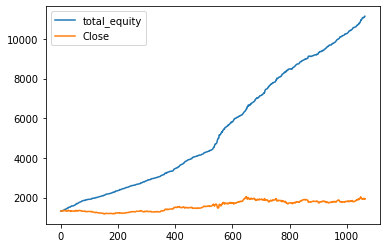

In [16]:
df_equity = pd.DataFrame()
df_equity["long_equity"] = eu.long_equity(df["updown_pred"], df["Close"])
df_equity["short_equity"] = eu.short_equity(df["updown_pred"], df["Close"])
df_equity["total_equity"] = eu.total_equity(df["updown_pred"], df["Close"])
df_equity["total_equity"].cumsum().plot()
df["Close"].plot()
plt.legend()

# Save Accuracies

In [21]:
df_prediction = pd.read_csv("../data/model_accuracy_gold.csv", index_col = False)
df_prediction

,Unnamed: 0.1,Unnamed: 0,LogReg_pred,LogReg_accuracy,LogReg_prob,RNN_pred,RNN_accuracy,RNN_prob,LSTM_price_accuracy,RF_pred,...,LGBM_pred,LGBM_accuracy,LGBM_prob,XGB_pred,XGB_accuracy,XGB_prob,y,kNN_pred,kNN_accuracy,kNN_prob
0,0,0,0,0.534272,0.435015,0,0.539906,0.440501,0.815962,0,...,0,0.534272,0.417784,0,0.535211,0.363009,1,0,0.535211,0.5
1,1,1,0,0.534272,0.438317,0,0.539906,0.438469,0.815962,0,...,0,0.534272,0.417784,0,0.535211,0.334406,0,0,0.535211,0.5
2,2,2,0,0.534272,0.441080,0,0.539906,0.438368,0.815962,1,...,0,0.534272,0.417784,1,0.535211,0.538637,1,0,0.535211,0.5
3,3,3,0,0.534272,0.435446,0,0.539906,0.437083,0.815962,0,...,0,0.534272,0.417784,0,0.535211,0.298839,1,0,0.535211,0.5
4,4,4,0,0.534272,0.430490,0,0.539906,0.403022,0.815962,0,...,0,0.534272,0.431615,0,0.535211,0.411486,1,0,0.535211,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,1060,1060,1,0.534272,0.528832,0,0.539906,0.486045,0.815962,0,...,0,0.534272,0.463188,0,0.535211,0.425173,0,0,0.535211,0.0
1061,1061,1061,1,0.534272,0.523879,1,0.539906,0.510491,0.815962,0,...,0,0.534272,0.478714,0,0.535211,0.425173,1,0,0.535211,0.5
1062,1062,1062,1,0.534272,0.521895,0,0.539906,0.478003,0.815962,0,...,0,0.534272,0.489069,0,0.535211,0.439999,1,0,0.535211,0.5
1063,1063,1063,1,0.534272,0.517769,0,0.539906,0.462106,0.815962,1,...,0,0.534272,0.484030,0,0.535211,0.464752,1,0,0.535211,0.5


In [18]:
df_prediction["LSTM_price_accuracy"] = [acc for x in range(len(df_prediction))]


In [19]:
df_prediction.to_csv("../data/model_accuracy_gold.csv")